In [1]:
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="Consolas ")
plt.rcParams["font.family"]="Consolas" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="Consolas", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐

In [3]:
def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

def vid_info(path, codec, name, fps):
    cap = cv2.VideoCapture(path)
    print(cap)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

    #재생할 파일의 높이 얻기
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    #재생할 파일의 프레임 레이트 얻기
    # fps = cap.get(cv2.CAP_PROP_FPS)
    
    #codec
    fourcc = cv2.VideoWriter_fourcc(*codec)
    
    #filename
    filename = name+'.mp4'
    
    #out 
    out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
    
    print('cap {0}, width {1}, height {2}, fps {3}'.format(cap, width, height, fps))
    print('codec {0}', 'filename {1}'.format(fourcc, filename))
    
    return cap, width, height, fps, fourcc, filename, out


### Find Starting Point & listing_img

In [50]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\basic.mp4")

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

back_org = back.copy()
if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)

# 비디오 매 프레임 처리
start_basic_list =[]
basic_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]
    frame_org = frame.copy()

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_basic_list.append(frame_num)
        basic_img_list.append(frame)
       
    cv2.imshow('frame', frame)
    out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

width 680, height 1080, fps 29.97002997002997


In [11]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\post.mp4")


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_post_list =[]
post_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_post_list.append(frame_num)
        post_img_list.append(frame)

    cv2.imshow('frame', frame)
    out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()

cv2.destroyAllWindows()

In [12]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\added.mp4")


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_add_list =[]
add_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_add_list.append(frame_num)
        add_img_list.append(frame)

    cv2.imshow('frame', frame)
    out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()

cv2.destroyAllWindows()

In [13]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\location.mp4")


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_loc_list =[]
loc_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_loc_list.append(frame_num)
        loc_img_list.append(frame)

    cv2.imshow('frame', frame)
    out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()

cv2.destroyAllWindows()

### box counting

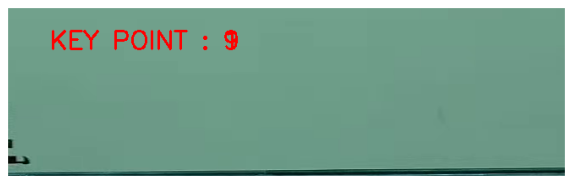

In [49]:
show(basic_img_list[0])

In [15]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [65]:
cont_basic = []
basic_cont_num = []

for i in basic_img_list:
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    (thresh, img_bin) = cv2.threshold(gray, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    img_bin = 255-img_bin
    # Defining a kernel length
    kernel_length = np.array(i).shape[1]//80
    
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    # cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    # show(verticle_lines_img)
    # show(horizontal_lines_img)
    # Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # cv2.imwrite("img_final_bin.jpg",img_final_bin)Thank
    # show(img_final_bin)
    # Find contours for image, which will detect all the boxes
    contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
    (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

    idx = 0
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
        if (w > 100 and h > 100) :
            idx += 1
            ver_img = i[y:y+h, x:x+w].copy()
            
    cv2.putText(ver_img, "KEY POINT : {}".format(len(contours)), (50,50), cv2.FONT_ITALIC, 1, (255,0,0), 2)
    cont_basic.append(ver_img)
    basic_cont_num.append(len(contours))

In [66]:
cont_post = []
post_cont_num = []

for i in post_img_list:
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    (thresh, img_bin) = cv2.threshold(gray, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    img_bin = 255-img_bin
    # Defining a kernel length
    kernel_length = np.array(i).shape[1]//80
    
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    # cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    # show(verticle_lines_img)
    # show(horizontal_lines_img)
    # Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # cv2.imwrite("img_final_bin.jpg",img_final_bin)Thank
    # show(img_final_bin)
    # Find contours for image, which will detect all the boxes
    contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
    (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

    idx = 0
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
        if (w > 100 and h > 100) :
            idx += 1
            ver_img = i[y:y+h, x:x+w].copy()
            
    cv2.putText(ver_img, "KEY POINT : {}".format(len(contours)), (50,50), cv2.FONT_ITALIC, 1, (255,0,0), 2)
    cont_post.append(ver_img)
    post_cont_num.append(len(contours))

In [74]:
cv2.destroyAllWindows()

### feature extraction

In [ ]:
back = img_list[0]
cv2.resize(back, dsize=(100, 100))
cv2.imshow('back', back)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
test = img_list[401]
show(test)

In [ ]:
test = img_list[401]
test = test[0:1080, 610:1320].copy()

gray = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)  #Harris works on float32 images. 

#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
harris = cv2.cornerHarris(gray,2,3,0.04)  

# Threshold for an optimal value, it may vary depending on the image.
test[harris>0.01*harris.max()]=[255,0,0]    # replace these pixels with blue

show(test)
cv2.imshow('Harris Corners',test)
cv2.waitKey(0)
cv2.destroyAllWindows()

### keypoint  먼저

In [ ]:
test = img_list[401]
test = test[0:1080, 610:1320].copy()

gray = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)  #Harris works on float32 images. 

#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
harris = cv2.cornerHarris(gray,2,3,0.04)  

# Threshold for an optimal value, it may vary depending on the image.
test[harris>0.01*harris.max()]=[255,0,0]    # replace these pixels with blue

show(test)
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
test = img_list[401]
test = test[0:1080, 610:1320].copy()

gray = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)  #Harris works on float32 images. 

#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
harris = cv2.cornerHarris(gray,2,3,0.04)  

# Threshold for an optimal value, it may vary depending on the image.
test[harris>0.01*harris.max()]=[255,0,0]    # replace these pixels with blue

show(test)
print(len(harris))
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
test = img_list[455]
test = test[0:1080, 610:1320].copy()

gray = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)  #Harris works on float32 images. 

#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
harris = cv2.cornerHarris(gray,2,3,0.04)  

# Threshold for an optimal value, it may vary depending on the image.
test[harris>0.01*harris.max()]=[255,0,0]    # replace these pixels with blue

show(test)
print(len(harris))
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
test = img_list[455]
show(test)

In [ ]:
test = img_list[401]
test = test[0:1080, 610:1320].copy()

gray = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)  #Harris works on float32 images. 

#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
corners = cv2.goodFeaturesToTrack(gray,50,0.05,10)
corners = np.int0(corners)   #np.int0 is int64

for i in corners:
    x,y = i.ravel()   # Ravel Returns a contiguous flattened array.
#    print(x,y)
    cv2.circle(test,(x,y),3,255,-1)   # replace these pixels with blue

show(test)
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
test = img_list[455]
test = test[0:1080, 610:1320].copy()

gray = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)  #Harris works on float32 images. 

#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
corners = cv2.goodFeaturesToTrack(gray,50,0.05,10)
corners = np.int0(corners)   #np.int0 is int64

for i in corners:
    x,y = i.ravel()   # Ravel Returns a contiguous flattened array.
#    print(x,y)
    cv2.circle(test,(x,y),3,255,-1)   # replace these pixels with blue

print(len(corners))
show(test)
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
len(corners)

In [ ]:
test = img_list[401]
test = test[0:1080, 610:1320].copy()

detector = cv2.FastFeatureDetector_create(50)   #Detects 50 points

kp = detector.detect(test, None)

img2 = cv2.drawKeypoints(test, kp, None, flags=0) # replace these pixels with blue
print(len(kp))
show(test)
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
test = img_list[430]
test = test[0:1080, 610:1320].copy()

detector = cv2.FastFeatureDetector_create(50)   #Detects 50 points

kp = detector.detect(test, None)

img2 = cv2.drawKeypoints(test, kp, None, flags=0) # replace these pixels with blue
print(len(kp))
# show(test)
cv2.imshow('Harris Corners',test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
test = img_list[401]
test = test[0:1080, 610:1320].copy()

orb = cv2.ORB_create(100)


kp, des = orb.detectAndCompute(test, None)


# draw only keypoints location,not size and orientation
#img2 = cv2.drawKeypoints(img, kp, None, flags=None)
# Now, let us draw with rich key points, reflecting descriptors. 
# Descriptors here show both the scale and the orientation of the keypoint.
img2 = cv2.drawKeypoints(test, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show(test)
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
test = img_list[455]
test = test[0:1080, 610:1320].copy()

orb = cv2.ORB_create(100)


kp, des = orb.detectAndCompute(test, None)


# draw only keypoints location,not size and orientation
#img2 = cv2.drawKeypoints(img, kp, None, flags=None)
# Now, let us draw with rich key points, reflecting descriptors. 
# Descriptors here show both the scale and the orientation of the keypoint.
img2 = cv2.drawKeypoints(test, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show(test)
# cv2.imshow('Harris Corners',test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
 
test = img_list[401]
test = test[0:1080, 610:1320].copy()
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

# SimpleBlobDetector 생성 ---①
detector = cv2.SimpleBlobDetector_create()
# 키 포인트 검출 ---②
keypoints = detector.detect(gray)
# 키 포인트를 빨간색으로 표시 ---③
img = cv2.drawKeypoints(test, keypoints, None, (0,0,255),\
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(len(keypoints))
cv2.imshow("Blob", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
/pwd

In [ ]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\basic.mp4")

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))

img_list = []
key_list = []
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # frame = frame[0:1080, 630:1310].copy()
    frame_org = frame.copy()
    frame_org = frame_org[0:1080, 610:1320].copy()
    frame_org = frame_org[400:600, 20:680]
    gray = cv2.cvtColor(frame_org, cv2.COLOR_BGR2GRAY)
    detector = cv2.SimpleBlobDetector_create()
    keypoints = detector.detect(gray)

    img = cv2.drawKeypoints(frame_org, keypoints, None, (0,0,255),\
                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2.putText(frame_org, "KEY POINT : {}".format(len(keypoints)), (50,50), cv2.FONT_ITALIC, 1, (255,0,0), 2)
    # show(frame_org)

    img_list.append(frame_org)
    key_list.append(len(keypoints))   
    cv2.imshow('frame', frame_org)
    out.write(frame_org)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\post.mp4")

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))

img_list = []
key_list = []
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # frame = frame[0:1080, 630:1310].copy()
    frame_org = frame.copy()
    frame_org = frame_org[0:1080, 610:1320].copy()
    frame_org = frame_org[400:600, 20:680]
    gray = cv2.cvtColor(frame_org, cv2.COLOR_BGR2GRAY)


    fast = cv2.FastFeatureDetector_create(50)
    # 특징점 검출 ---②
    keypoints = fast.detect(gray, None)
    key_list.append(len(keypoints))
    frame_org = cv2.drawKeypoints(frame_org, keypoints, None, (0,0,255),\
                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2.putText(frame_org, "KEY POINT : {}".format(len(keypoints)), (50,50), cv2.FONT_ITALIC, 1, (255,0,0), 2)
    # show(frame_org)

    img_list.append(frame_org)
    key_list.append(len(keypoints))   
    cv2.imshow('frame', frame_org)
    out.write(frame_org)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\basic.mp4")

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))

img_list = []
key_list = []
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # frame = frame[0:1080, 630:1310].copy()
    frame_org = frame.copy()
    frame_org = frame_org[0:1080, 610:1320].copy()
    frame_org = frame_org[400:600, 20:680]
    gray = cv2.cvtColor(frame_org, cv2.COLOR_BGR2GRAY)


    fast = cv2.FastFeatureDetector_create(50)
    # 특징점 검출 ---②
    keypoints = fast.detect(gray, None)
    key_list.append(len(keypoints))
    frame_org = cv2.drawKeypoints(frame_org, keypoints, None, (0,0,255),\
                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2.putText(frame_org, "KEY POINT : {}".format(len(keypoints)), (50,50), cv2.FONT_ITALIC, 1, (255,0,0), 2)
    # show(frame_org)

    img_list.append(frame_org)
    key_list.append(len(keypoints))   
    cv2.imshow('frame', frame_org)
    out.write(frame_org)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
show(img_list[400])

In [ ]:
show(img_list[455])

In [ ]:
show(img_list[337])

In [ ]:
show(img_list[400])

In [ ]:
show(img_list[410])

In [ ]:
cap = cv2.VideoCapture("C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\org\\testing_vid\\basic.mp4")

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))

img_list = []
key_list = []
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # frame = frame[0:1080, 630:1310].copy()
    frame_org = frame.copy()
    frame_org = frame_org[0:1080, 610:1320].copy()
    frame_org = frame_org[400:600, 20:680]
    gray = cv2.cvtColor(frame_org, cv2.COLOR_BGR2GRAY)


    harris = cv2.cornerHarris(gray,2,3,0.04)  

    # Threshold for an optimal value, it may vary depending on the image.
    frame_org[harris>0.01*harris.max()]=[255,0,0] 
    print(a)
    # frame_org = cv2.drawKeypoints(frame_org, keypoints, None, (0,0,255),\
    #                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2.putText(frame_org, "KEY POINT : {}".format(len(harris)), (50,50), cv2.FONT_ITALIC, 1, (255,0,0), 2)
    # show(frame_org)

    img_list.append(frame_org)
    key_list.append(len(keypoints))   
    cv2.imshow('frame', frame_org)
    out.write(frame_org)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
show(img_list[0])